important 変数を個々に定義する

In [11]:
SensorNum=4 # Sensor number
SampleNum=16 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccY' # Axis

In [12]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [13]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1,l2,l1l2,activity_l1,activity_l2,activity_l1l2
import matplotlib.image as mpimg


In [14]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [15]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-18'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GlaphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GlaphDataPath): os.makedirs(GlaphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [16]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [17]:
w=window.Window()
w.SetData(Axis,dic[Axis])
wind=w.Compile(windowWidth=SampleNum,overlap=Overlap)
windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

AccY is registed now
Build Complete
(254742,)


In [18]:
windoW.shape

(15921, 16)

**前回やった学習をもう１度やってみる  
今回は、正則化をする  
使用するものはl1( L1 weight regularization penalty, also known as LASSO )  
実際、どのくらいの重みにすればいいのかわからないので色々試してみる  **

In [19]:
ParameterL1=[0.01,0.1,0.3,0.5,0.7,0.9]

L1 parameter is 0.01
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 5s - loss: 0.0161 - val_loss: 0.0021
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0047 - val_loss: 9.5296e-04
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0035 - val_loss: 6.9823e-04
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0028 - val_loss: 5.5983e-04
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0025 - val_loss: 4.8938e-04
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0023 - val_loss: 4.0893e-04
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0021 - val_loss: 3.8759e-04
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0019 - val_loss: 4.3513e-04
Epoch 9/50
15921/15921 [==============================] - 19s - loss: 0.0018 - val_loss: 3.3765e-04
Epoch 10/50
15921/15921 [=========

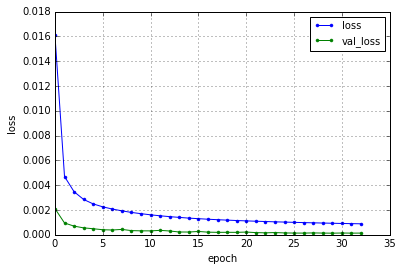

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.0125 - val_loss: 0.0014
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0044 - val_loss: 7.5434e-04
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0034 - val_loss: 5.7525e-04
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0028 - val_loss: 4.6348e-04
Epoch 5/50
15921/15921 [==============================] - 13s - loss: 0.0025 - val_loss: 3.9088e-04
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0022 - val_loss: 3.0547e-04
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0020 - val_loss: 2.3793e-04
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0019 - val_loss: 2.2660e-04
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0018 - val_loss: 2.3857e-04
Epoch 10/50
15921/15921 [=============================

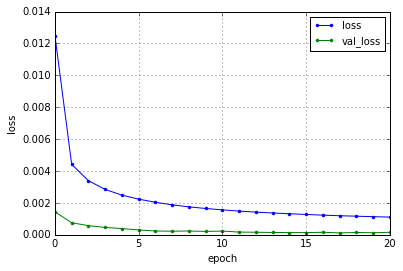

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 9s - loss: 0.0137 - val_loss: 0.0013
Epoch 2/50
15921/15921 [==============================] - 9s - loss: 0.0046 - val_loss: 5.6889e-04
Epoch 3/50
15921/15921 [==============================] - 10s - loss: 0.0034 - val_loss: 4.0376e-04
Epoch 4/50
15921/15921 [==============================] - 9s - loss: 0.0028 - val_loss: 3.4979e-04
Epoch 5/50
15921/15921 [==============================] - 9s - loss: 0.0025 - val_loss: 2.9780e-04
Epoch 6/50
15921/15921 [==============================] - 9s - loss: 0.0022 - val_loss: 3.0279e-04
Epoch 7/50
15921/15921 [==============================] - 9s - loss: 0.0021 - val_loss: 2.4474e-04
Epoch 8/50
15921/15921 [==============================] - 9s - loss: 0.0019 - val_loss: 2.2691e-04
Epoch 9/50
15921/15921 [==============================] - 9s - loss: 0.0018 - val_loss: 2.3947e-04
Epoch 10/50
15921/15921 [==============================] - 9s 

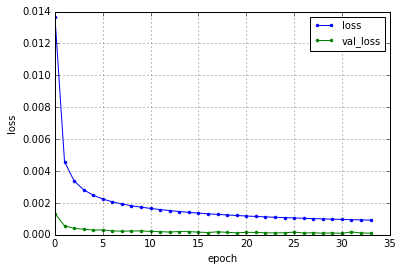

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0110 - val_loss: 9.1262e-04
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0044 - val_loss: 5.1908e-04
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0034 - val_loss: 3.4485e-04
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0029 - val_loss: 3.2160e-04
Epoch 5/50
15921/15921 [==============================] - 19s - loss: 0.0026 - val_loss: 2.9551e-04
Epoch 6/50
15921/15921 [==============================] - 19s - loss: 0.0023 - val_loss: 2.3211e-04
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0022 - val_loss: 2.3793e-04
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0020 - val_loss: 2.1455e-04
Epoch 9/50
15921/15921 [==============================] - 19s - loss: 0.0019 - val_loss: 2.1589e-04
Epoch 10/50
15921/15921 [=========================

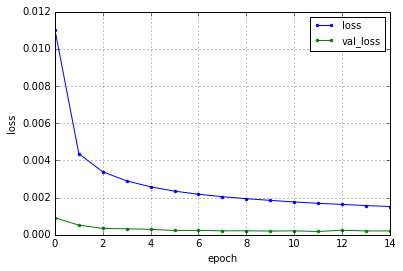

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.0134 - val_loss: 6.7426e-04
Epoch 2/50
15921/15921 [==============================] - 96s - loss: 0.0048 - val_loss: 3.4962e-04
Epoch 3/50
15921/15921 [==============================] - 209s - loss: 0.0036 - val_loss: 3.2761e-04
Epoch 4/50
15921/15921 [==============================] - 184s - loss: 0.0031 - val_loss: 2.2482e-04
Epoch 5/50
15921/15921 [==============================] - 200s - loss: 0.0027 - val_loss: 2.2492e-04
Epoch 6/50
15921/15921 [==============================] - 193s - loss: 0.0025 - val_loss: 2.5073e-04
Epoch 7/50
15921/15921 [==============================] - 201s - loss: 0.0023 - val_loss: 2.9655e-04


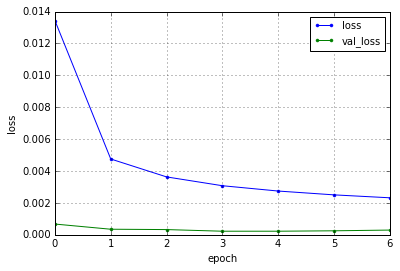

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 217s - loss: 0.0134 - val_loss: 4.8368e-04
Epoch 2/50
15921/15921 [==============================] - 208s - loss: 0.0049 - val_loss: 2.6587e-04
Epoch 3/50
15921/15921 [==============================] - 218s - loss: 0.0039 - val_loss: 3.5073e-04
Epoch 4/50
15921/15921 [==============================] - 208s - loss: 0.0034 - val_loss: 3.0456e-04
Epoch 5/50
15921/15921 [==============================] - 211s - loss: 0.0031 - val_loss: 2.4451e-04
Epoch 6/50
15921/15921 [==============================] - 199s - loss: 0.0028 - val_loss: 2.1309e-04
Epoch 7/50
15921/15921 [==============================] - 210s - loss: 0.0026 - val_loss: 1.7217e-04
Epoch 8/50
15921/15921 [==============================] - 197s - loss: 0.0025 - val_loss: 1.6597e-04
Epoch 9/50
15921/15921 [==============================] - 211s - loss: 0.0024 - val_loss: 1.7351e-04
Epoch 10/50
15921/15921 [================

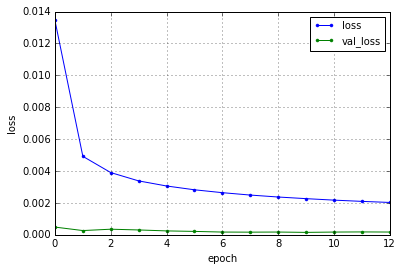

L1 parameter is 0.1
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 209s - loss: 0.0359 - val_loss: 0.0116
Epoch 2/50
15921/15921 [==============================] - 198s - loss: 0.0193 - val_loss: 0.0054
Epoch 3/50
15921/15921 [==============================] - 210s - loss: 0.0144 - val_loss: 0.0035
Epoch 4/50
15921/15921 [==============================] - 201s - loss: 0.0119 - val_loss: 0.0028
Epoch 5/50
15921/15921 [==============================] - 211s - loss: 0.0104 - val_loss: 0.0021
Epoch 6/50
15921/15921 [==============================] - 197s - loss: 0.0093 - val_loss: 0.0022
Epoch 7/50
15921/15921 [==============================] - 210s - loss: 0.0086 - val_loss: 0.0019
Epoch 8/50
15921/15921 [==============================] - 199s - loss: 0.0080 - val_loss: 0.0018
Epoch 9/50
15921/15921 [==============================] - 210s - loss: 0.0075 - val_loss: 0.0016
Epoch 10/50
15921/15921 [==============================] 

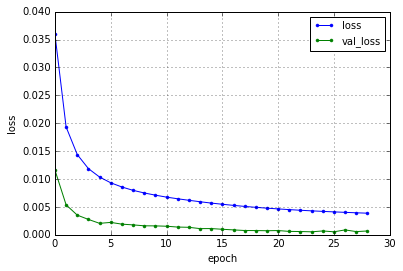

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 197s - loss: 0.0421 - val_loss: 0.0258
Epoch 2/50
15921/15921 [==============================] - 211s - loss: 0.0262 - val_loss: 0.0086
Epoch 3/50
15921/15921 [==============================] - 211s - loss: 0.0186 - val_loss: 0.0051
Epoch 4/50
15921/15921 [==============================] - 200s - loss: 0.0144 - val_loss: 0.0029
Epoch 5/50
15921/15921 [==============================] - 211s - loss: 0.0122 - val_loss: 0.0022
Epoch 6/50
15921/15921 [==============================] - 200s - loss: 0.0108 - val_loss: 0.0020
Epoch 7/50
15921/15921 [==============================] - 210s - loss: 0.0099 - val_loss: 0.0020
Epoch 8/50
15921/15921 [==============================] - 199s - loss: 0.0092 - val_loss: 0.0020
Epoch 9/50
15921/15921 [==============================] - 210s - loss: 0.0086 - val_loss: 0.0017
Epoch 10/50
15921/15921 [==============================] - 197s - loss: 0.008

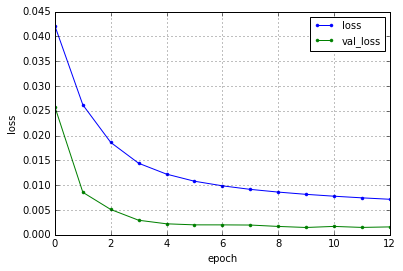

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 210s - loss: 0.0421 - val_loss: 0.0095
Epoch 2/50
15921/15921 [==============================] - 197s - loss: 0.0213 - val_loss: 0.0039
Epoch 3/50
15921/15921 [==============================] - 209s - loss: 0.0165 - val_loss: 0.0029
Epoch 4/50
15921/15921 [==============================] - 189s - loss: 0.0138 - val_loss: 0.0025
Epoch 5/50
15921/15921 [==============================] - 207s - loss: 0.0119 - val_loss: 0.0020
Epoch 6/50
15921/15921 [==============================] - 172s - loss: 0.0108 - val_loss: 0.0020
Epoch 7/50
15921/15921 [==============================] - 200s - loss: 0.0099 - val_loss: 0.0019
Epoch 8/50
15921/15921 [==============================] - 182s - loss: 0.0093 - val_loss: 0.0016
Epoch 9/50
15921/15921 [==============================] - 194s - loss: 0.0087 - val_loss: 0.0016
Epoch 10/50
15921/15921 [==============================] - 196s - loss: 0.008

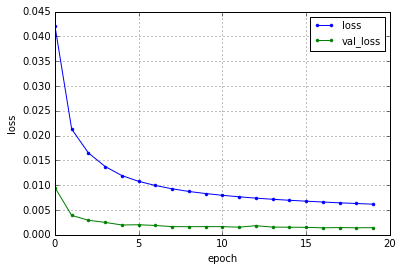

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0442 - val_loss: 0.0186
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0247 - val_loss: 0.0056
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0176 - val_loss: 0.0031
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0145 - val_loss: 0.0025
Epoch 5/50
15921/15921 [==============================] - 19s - loss: 0.0127 - val_loss: 0.0025
Epoch 6/50
15921/15921 [==============================] - 19s - loss: 0.0115 - val_loss: 0.0013
Epoch 7/50
15921/15921 [==============================] - 20s - loss: 0.0106 - val_loss: 0.0017
Epoch 8/50
15921/15921 [==============================] - 20s - loss: 0.0100 - val_loss: 0.0014
Epoch 9/50
15921/15921 [==============================] - 19s - loss: 0.0094 - val_loss: 0.0013
Epoch 10/50
15921/15921 [==============================] - 20s - loss: 0.0090 - val_lo

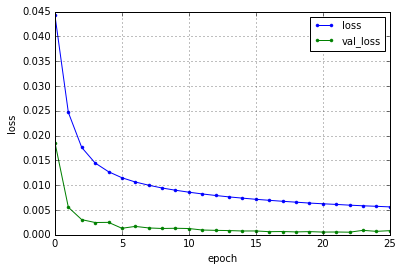

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0526 - val_loss: 0.0155
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0268 - val_loss: 0.0050
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0203 - val_loss: 0.0035
Epoch 4/50
15921/15921 [==============================] - 19s - loss: 0.0171 - val_loss: 0.0025
Epoch 5/50
15921/15921 [==============================] - 20s - loss: 0.0153 - val_loss: 0.0021
Epoch 6/50
15921/15921 [==============================] - 20s - loss: 0.0141 - val_loss: 0.0023
Epoch 7/50
15921/15921 [==============================] - 19s - loss: 0.0131 - val_loss: 0.0019
Epoch 8/50
15921/15921 [==============================] - 19s - loss: 0.0124 - val_loss: 0.0015
Epoch 9/50
15921/15921 [==============================] - 19s - loss: 0.0117 - val_loss: 0.0017
Epoch 10/50
15921/15921 [==============================] - 20s - loss: 0.0113 - val_lo

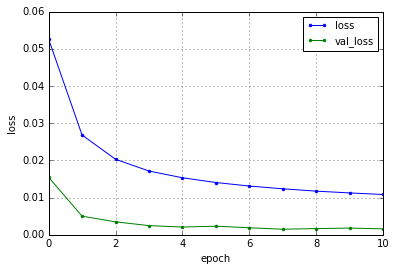

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 20s - loss: 0.0692 - val_loss: 0.0148
Epoch 2/50
15921/15921 [==============================] - 20s - loss: 0.0341 - val_loss: 0.0050
Epoch 3/50
15921/15921 [==============================] - 20s - loss: 0.0263 - val_loss: 0.0027
Epoch 4/50
15921/15921 [==============================] - 20s - loss: 0.0223 - val_loss: 0.0026
Epoch 5/50
15921/15921 [==============================] - 19s - loss: 0.0200 - val_loss: 0.0019
Epoch 6/50
15921/15921 [==============================] - 194s - loss: 0.0183 - val_loss: 0.0019
Epoch 7/50
15921/15921 [==============================] - 220s - loss: 0.0170 - val_loss: 0.0018
Epoch 8/50
15921/15921 [==============================] - 209s - loss: 0.0160 - val_loss: 0.0017
Epoch 9/50
15921/15921 [==============================] - 220s - loss: 0.0153 - val_loss: 0.0017
Epoch 10/50
15921/15921 [==============================] - 264s - loss: 0.0146 - v

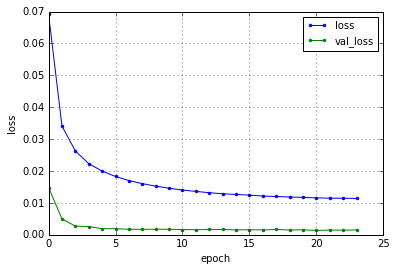

L1 parameter is 0.3
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.0423 - val_loss: 0.0283
Epoch 2/50
15921/15921 [==============================] - 199s - loss: 0.0345 - val_loss: 0.0278
Epoch 3/50
15921/15921 [==============================] - 212s - loss: 0.0331 - val_loss: 0.0252
Epoch 4/50
15921/15921 [==============================] - 205s - loss: 0.0309 - val_loss: 0.0175
Epoch 5/50
15921/15921 [==============================] - 206s - loss: 0.0271 - val_loss: 0.0114
Epoch 6/50
15921/15921 [==============================] - 213s - loss: 0.0233 - val_loss: 0.0073
Epoch 7/50
15921/15921 [==============================] - 199s - loss: 0.0207 - val_loss: 0.0059
Epoch 8/50
15921/15921 [==============================] - 212s - loss: 0.0187 - val_loss: 0.0045
Epoch 9/50
15921/15921 [==============================] - 200s - loss: 0.0171 - val_loss: 0.0036
Epoch 10/50
15921/15921 [==============================] 

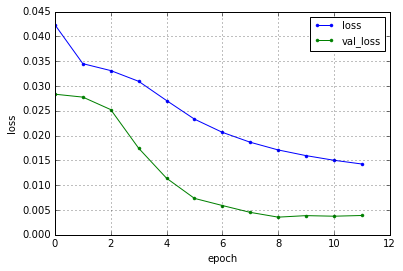

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 201s - loss: 0.0679 - val_loss: 0.0283
Epoch 2/50
15921/15921 [==============================] - 213s - loss: 0.0411 - val_loss: 0.0281
Epoch 3/50
15921/15921 [==============================] - 200s - loss: 0.0386 - val_loss: 0.0264
Epoch 4/50
15921/15921 [==============================] - 212s - loss: 0.0365 - val_loss: 0.0216
Epoch 5/50
15921/15921 [==============================] - 200s - loss: 0.0328 - val_loss: 0.0140
Epoch 6/50
15921/15921 [==============================] - 213s - loss: 0.0283 - val_loss: 0.0075
Epoch 7/50
15921/15921 [==============================] - 199s - loss: 0.0249 - val_loss: 0.0058
Epoch 8/50
15921/15921 [==============================] - 213s - loss: 0.0223 - val_loss: 0.0052
Epoch 9/50
15921/15921 [==============================] - 203s - loss: 0.0202 - val_loss: 0.0044
Epoch 10/50
15921/15921 [==============================] - 201s - loss: 0.018

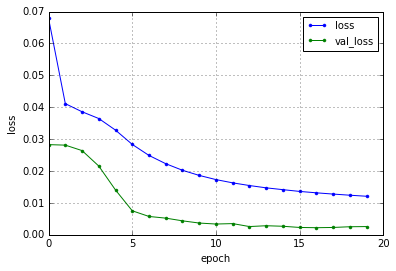

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.0813 - val_loss: 0.0276
Epoch 2/50
15921/15921 [==============================] - 198s - loss: 0.0438 - val_loss: 0.0278
Epoch 3/50
15921/15921 [==============================] - 213s - loss: 0.0403 - val_loss: 0.0274
Epoch 4/50
15921/15921 [==============================] - 203s - loss: 0.0376 - val_loss: 0.0197
Epoch 5/50
15921/15921 [==============================] - 210s - loss: 0.0332 - val_loss: 0.0119
Epoch 6/50
15921/15921 [==============================] - 213s - loss: 0.0287 - val_loss: 0.0070
Epoch 7/50
15921/15921 [==============================] - 200s - loss: 0.0256 - val_loss: 0.0049
Epoch 8/50
15921/15921 [==============================] - 214s - loss: 0.0232 - val_loss: 0.0043
Epoch 9/50
15921/15921 [==============================] - 201s - loss: 0.0213 - val_loss: 0.0036
Epoch 10/50
15921/15921 [==============================] - 213s - loss: 0.019

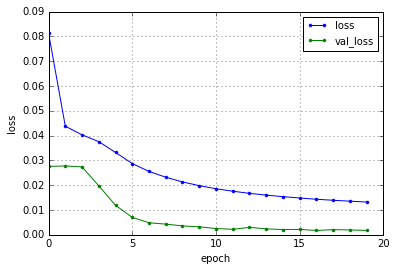

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.0746 - val_loss: 0.0280
Epoch 2/50
15921/15921 [==============================] - 196s - loss: 0.0467 - val_loss: 0.0275
Epoch 3/50
15921/15921 [==============================] - 212s - loss: 0.0433 - val_loss: 0.0258
Epoch 4/50
15921/15921 [==============================] - 199s - loss: 0.0407 - val_loss: 0.0231
Epoch 5/50
15921/15921 [==============================] - 211s - loss: 0.0372 - val_loss: 0.0150
Epoch 6/50
15921/15921 [==============================] - 198s - loss: 0.0328 - val_loss: 0.0081
Epoch 7/50
15921/15921 [==============================] - 212s - loss: 0.0293 - val_loss: 0.0084
Epoch 8/50
15921/15921 [==============================] - 198s - loss: 0.0267 - val_loss: 0.0041
Epoch 9/50
15921/15921 [==============================] - 212s - loss: 0.0247 - val_loss: 0.0040
Epoch 10/50
15921/15921 [==============================] - 209s - loss: 0.023

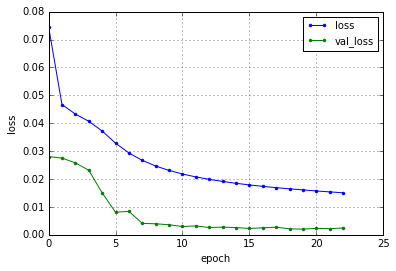

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 212s - loss: 0.1132 - val_loss: 0.0282
Epoch 2/50
15921/15921 [==============================] - 207s - loss: 0.0579 - val_loss: 0.0273
Epoch 3/50
15921/15921 [==============================] - 205s - loss: 0.0525 - val_loss: 0.0266
Epoch 4/50
15921/15921 [==============================] - 212s - loss: 0.0493 - val_loss: 0.0247
Epoch 5/50
15921/15921 [==============================] - 199s - loss: 0.0459 - val_loss: 0.0181
Epoch 6/50
15921/15921 [==============================] - 213s - loss: 0.0415 - val_loss: 0.0112
Epoch 7/50
15921/15921 [==============================] - 200s - loss: 0.0374 - val_loss: 0.0081
Epoch 8/50
15921/15921 [==============================] - 212s - loss: 0.0340 - val_loss: 0.0051
Epoch 9/50
15921/15921 [==============================] - 120s - loss: 0.0315 - val_loss: 0.0047
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0294

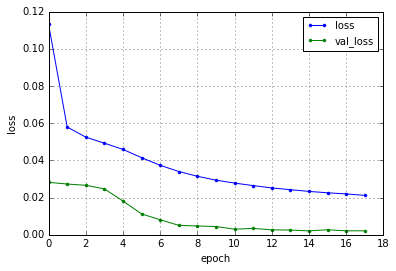

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1300 - val_loss: 0.0284
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.0686 - val_loss: 0.0282
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0629 - val_loss: 0.0278
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0599 - val_loss: 0.0269
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0573 - val_loss: 0.0257
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0551 - val_loss: 0.0245
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0522 - val_loss: 0.0191
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0488 - val_loss: 0.0135
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0445 - val_loss: 0.0068
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0413 - val_lo

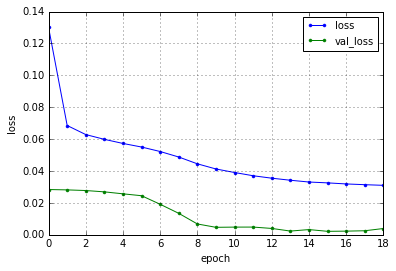

L1 parameter is 0.5
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.0568 - val_loss: 0.0288
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0426 - val_loss: 0.0289
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0409 - val_loss: 0.0282
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0396 - val_loss: 0.0282
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0387 - val_loss: 0.0283
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0378 - val_loss: 0.0258
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0367 - val_loss: 0.0253
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0351 - val_loss: 0.0203
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0326 - val_loss: 0.0145
Epoch 10/50
15921/15921 [==============================] - 14s - l

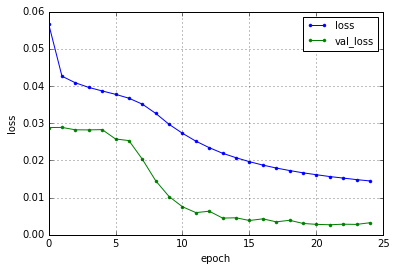

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.0826 - val_loss: 0.0288
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.0448 - val_loss: 0.0283
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0418 - val_loss: 0.0284
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0404 - val_loss: 0.0283
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0394 - val_loss: 0.0275
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0384 - val_loss: 0.0259
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0372 - val_loss: 0.0229
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0355 - val_loss: 0.0187
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0329 - val_loss: 0.0127
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0302 - val_lo

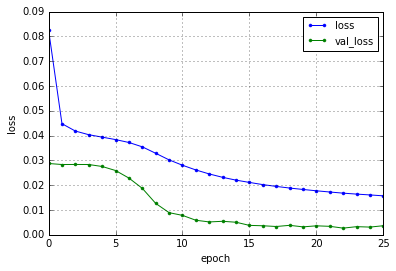

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 13s - loss: 0.0956 - val_loss: 0.0287
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0510 - val_loss: 0.0284
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0486 - val_loss: 0.0281
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0467 - val_loss: 0.0280
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0452 - val_loss: 0.0278
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0439 - val_loss: 0.0265
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0427 - val_loss: 0.0252
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0412 - val_loss: 0.0207
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0391 - val_loss: 0.0154
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0365 - val_lo

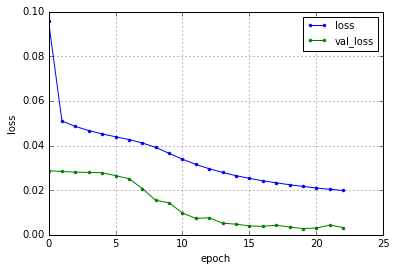

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.0905 - val_loss: 0.0287
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0568 - val_loss: 0.0288
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0518 - val_loss: 0.0282
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0492 - val_loss: 0.0282
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0478 - val_loss: 0.0286
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0465 - val_loss: 0.0277
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0454 - val_loss: 0.0278
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0444 - val_loss: 0.0276
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0433 - val_loss: 0.0287
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0422 - val_lo

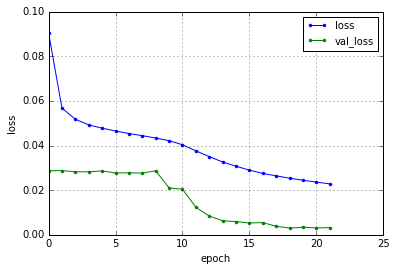

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1560 - val_loss: 0.0285
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0750 - val_loss: 0.0284
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0661 - val_loss: 0.0285
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0623 - val_loss: 0.0287
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0602 - val_loss: 0.0276
Epoch 6/50
15921/15921 [==============================] - 12s - loss: 0.0584 - val_loss: 0.0275
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0568 - val_loss: 0.0271
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0553 - val_loss: 0.0273
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0538 - val_loss: 0.0215
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0519 - val_lo

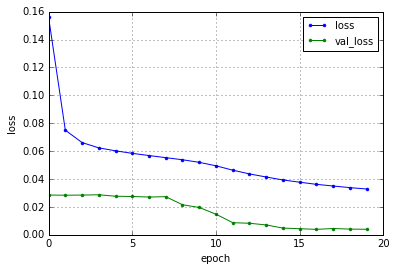

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.2091 - val_loss: 0.0284
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1005 - val_loss: 0.0277
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0896 - val_loss: 0.0289
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0838 - val_loss: 0.0284
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0800 - val_loss: 0.0267
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0770 - val_loss: 0.0279
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0747 - val_loss: 0.0279
Epoch 8/50
15921/15921 [==============================] - 13s - loss: 0.0729 - val_loss: 0.0276


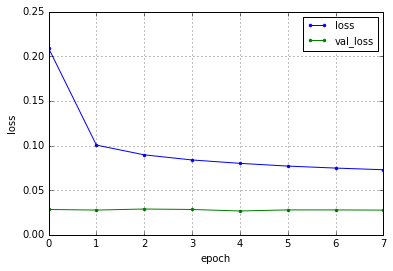

L1 parameter is 0.7
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.0801 - val_loss: 0.0288
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0482 - val_loss: 0.0284
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0439 - val_loss: 0.0283
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0410 - val_loss: 0.0288
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0390 - val_loss: 0.0285
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0379 - val_loss: 0.0281
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0372 - val_loss: 0.0279
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0367 - val_loss: 0.0282
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0363 - val_loss: 0.0291
Epoch 10/50
15921/15921 [==============================] - 14s - l

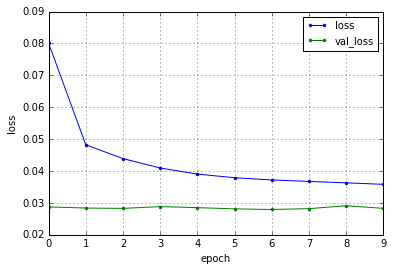

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1177 - val_loss: 0.0287
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0563 - val_loss: 0.0282
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0514 - val_loss: 0.0281
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0482 - val_loss: 0.0283
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0461 - val_loss: 0.0286
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0446 - val_loss: 0.0272
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0436 - val_loss: 0.0276
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0426 - val_loss: 0.0273
Epoch 9/50
15921/15921 [==============================] - 15s - loss: 0.0417 - val_loss: 0.0269
Epoch 10/50
15921/15921 [==============================] - 15s - loss: 0.0407 - val_lo

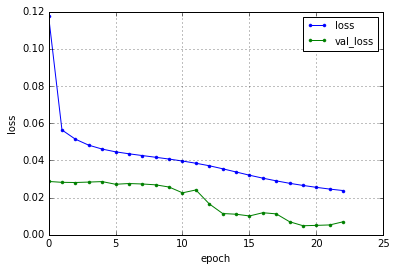

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1399 - val_loss: 0.0282
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0632 - val_loss: 0.0285
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0576 - val_loss: 0.0288
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0549 - val_loss: 0.0284


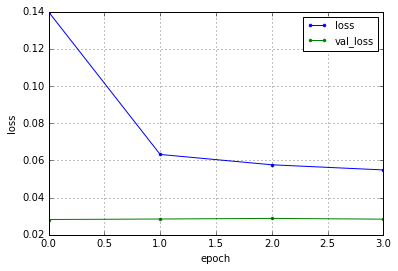

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1402 - val_loss: 0.0288
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0836 - val_loss: 0.0283
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0726 - val_loss: 0.0284
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0649 - val_loss: 0.0281
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0601 - val_loss: 0.0287
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0575 - val_loss: 0.0281
Epoch 7/50
15921/15921 [==============================] - 15s - loss: 0.0557 - val_loss: 0.0282


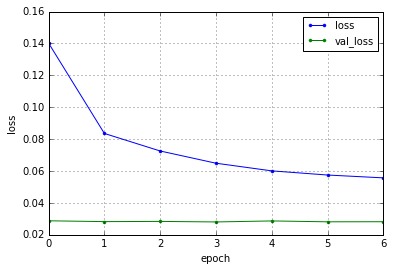

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2114 - val_loss: 0.0284
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0949 - val_loss: 0.0284
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0839 - val_loss: 0.0285
Epoch 4/50
15921/15921 [==============================] - 14s - loss: 0.0782 - val_loss: 0.0283
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0746 - val_loss: 0.0288
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0717 - val_loss: 0.0285
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0695 - val_loss: 0.0287


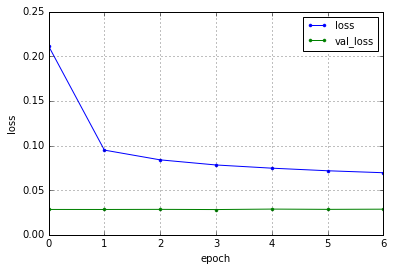

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.2852 - val_loss: 0.0286
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1284 - val_loss: 0.0282
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1154 - val_loss: 0.0295
Epoch 4/50
15921/15921 [==============================] - 13s - loss: 0.1082 - val_loss: 0.0293
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1031 - val_loss: 0.0289


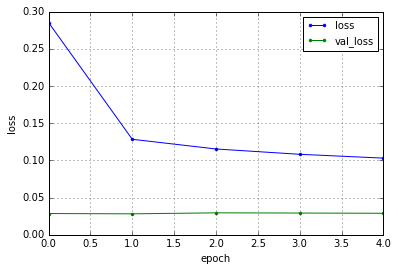

L1 parameter is 0.9
Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.0846 - val_loss: 0.0286
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0467 - val_loss: 0.0288
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0442 - val_loss: 0.0287
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0430 - val_loss: 0.0288


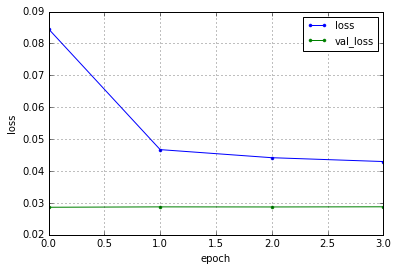

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.1358 - val_loss: 0.0284
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.0630 - val_loss: 0.0284
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0565 - val_loss: 0.0282
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0527 - val_loss: 0.0284
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0504 - val_loss: 0.0288
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0488 - val_loss: 0.0285


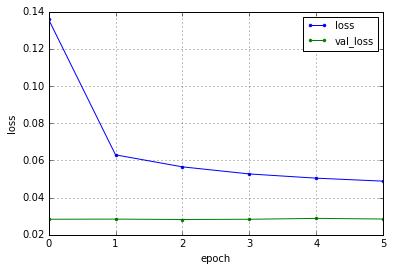

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1708 - val_loss: 0.0287
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.0791 - val_loss: 0.0285
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.0700 - val_loss: 0.0286
Epoch 4/50
15921/15921 [==============================] - 13s - loss: 0.0645 - val_loss: 0.0286
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0613 - val_loss: 0.0282
Epoch 6/50
15921/15921 [==============================] - 14s - loss: 0.0589 - val_loss: 0.0275
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0571 - val_loss: 0.0278
Epoch 8/50
15921/15921 [==============================] - 14s - loss: 0.0553 - val_loss: 0.0294
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0539 - val_loss: 0.0283


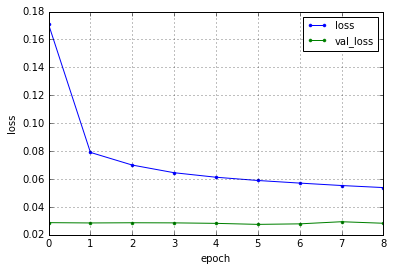

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.1628 - val_loss: 0.0282
Epoch 2/50
15921/15921 [==============================] - 14s - loss: 0.0846 - val_loss: 0.0285
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.0749 - val_loss: 0.0285
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0697 - val_loss: 0.0280
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.0664 - val_loss: 0.0281
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0641 - val_loss: 0.0283
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0620 - val_loss: 0.0281


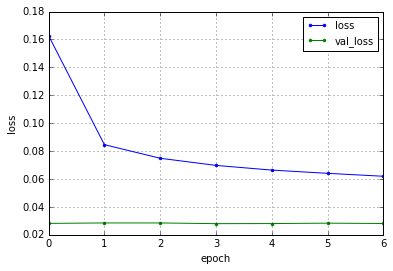

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 15s - loss: 0.2598 - val_loss: 0.0286
Epoch 2/50
15921/15921 [==============================] - 15s - loss: 0.1162 - val_loss: 0.0289
Epoch 3/50
15921/15921 [==============================] - 15s - loss: 0.1031 - val_loss: 0.0286
Epoch 4/50
15921/15921 [==============================] - 15s - loss: 0.0959 - val_loss: 0.0287
Epoch 5/50
15921/15921 [==============================] - 15s - loss: 0.0909 - val_loss: 0.0287
Epoch 6/50
15921/15921 [==============================] - 15s - loss: 0.0874 - val_loss: 0.0281
Epoch 7/50
15921/15921 [==============================] - 14s - loss: 0.0841 - val_loss: 0.0284
Epoch 8/50
15921/15921 [==============================] - 15s - loss: 0.0811 - val_loss: 0.0286
Epoch 9/50
15921/15921 [==============================] - 14s - loss: 0.0789 - val_loss: 0.0276
Epoch 10/50
15921/15921 [==============================] - 14s - loss: 0.0768 - val_lo

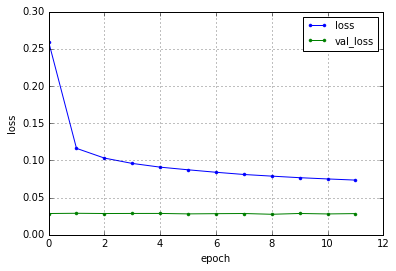

Train on 15921 samples, validate on 15921 samples
Epoch 1/50
15921/15921 [==============================] - 14s - loss: 0.3732 - val_loss: 0.0284
Epoch 2/50
15921/15921 [==============================] - 13s - loss: 0.1709 - val_loss: 0.0284
Epoch 3/50
15921/15921 [==============================] - 14s - loss: 0.1435 - val_loss: 0.0284
Epoch 4/50
15921/15921 [==============================] - 13s - loss: 0.1322 - val_loss: 0.0289
Epoch 5/50
15921/15921 [==============================] - 14s - loss: 0.1253 - val_loss: 0.0291


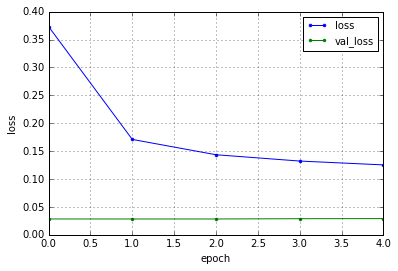

In [20]:
for pl1 in ParameterL1:
    print 'L1 parameter is '+str(pl1)
    for encoding_dim in EncodingDim:
        # define SaveFileName
        commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'-L1='+str(pl1)
        SaveFileNameEncord=DataName+'_encoded'+commonLabel
        SaveFileNameDecord=DataName+'_decoded'+commonLabel
        SaveFileNameNet=DataName+'_net'+'_edim='+commonLabel
        SaveFileNameTrain=DataName+'_train'+commonLabel
        SaveFileNameTest=DataName+'_test'+commonLabel
        SaveFileNameGlaph=GlaphDataPath+DataName+commonLabel+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh',
                       activity_regularizer=activity_l1(pl1))(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=2)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()